In [1]:
import pandas as pd
 
df = pd.read_csv("/Users/paoloantoniocapodiferroescorcha/Desktop/proyecto_superheroes/Data/superheroes1_api.csv")

In [2]:
df.head(5)

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura_metric,Peso_metric,Color_Ojos,Color_Pelo,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,Human,203 cm,441 kg,Yellow,No Hair,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,Icthyo Sapien,191 cm,65 kg,Blue,No Hair,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,Ungaran,185 cm,90 kg,Blue,No Hair,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,4,Abomination,63,80,53,90,62,95,Male,Human / Radiation,203 cm,441 kg,Green,No Hair,Emil Blonsky,"Agent R-7, Ravager of Worlds","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,5,Abraxas,88,63,83,100,100,55,Male,Cosmic Entity,0 cm,0 kg,Blue,Black,Abraxas,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad


In [3]:
df = df.drop(["Color_Ojos", "Color_Pelo", "Etnia",], axis=1)

df.head()

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Altura_metric,Peso_metric,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,203 cm,441 kg,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,191 cm,65 kg,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,185 cm,90 kg,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,4,Abomination,63,80,53,90,62,95,Male,203 cm,441 kg,Emil Blonsky,"Agent R-7, Ravager of Worlds","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,5,Abraxas,88,63,83,100,100,55,Male,0 cm,0 kg,Abraxas,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad


In [4]:
df = df.rename(columns={"Altura_metric": "Altura" , "Peso_metric": "Peso"})
df.head()

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Altura,Peso,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,203 cm,441 kg,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,191 cm,65 kg,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,185 cm,90 kg,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,4,Abomination,63,80,53,90,62,95,Male,203 cm,441 kg,Emil Blonsky,"Agent R-7, Ravager of Worlds","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,5,Abraxas,88,63,83,100,100,55,Male,0 cm,0 kg,Abraxas,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad


In [5]:
import numpy as np
import requests
import json
import pandas as pd
from pprint import pprint
from time import sleep
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys

In [6]:
def limpiar_columnas(x):
    if x is None:
        return np.nan
    if x == "Sin dato":
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

df["Inteligencia"] = df["Inteligencia"].map(limpiar_columnas)
df["Fuerza"] = df["Fuerza"].map(limpiar_columnas)
df["Velocidad"] = df["Velocidad"].map(limpiar_columnas)
df["Potencia"] = df["Potencia"].map(limpiar_columnas)
df["Combate"] = df["Combate"].map(limpiar_columnas)
df["Durabilidad"] = df["Durabilidad"].map(limpiar_columnas)

df1 = df
        

In [7]:
df1 = df1.drop(["ID","Genero","Altura","Peso","Nombre Completo", "Alias", "Lugar de nacimiento" , "Primera aparición" , "Editor", "Alineación"], axis=1)

In [8]:
#1¿ Cual es el superheroe con mas potencia, mas veloz(velocidad) y mas poder de combate? ¿En base a combinar estas 3 habilidades cual es el superheroe con mayores capacidades?

In [40]:
potencia_max = df1["Potencia"].max()
df_max_potencia = df1[df1["Potencia"] == potencia_max]
df_max_potencia.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
1,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0
6,Adam Monroe,63.0,10.0,12.0,100.0,100.0,64.0
11,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
13,Alan Scott,63.0,80.0,23.0,90.0,100.0,32.0


In [61]:
velocidad_max = df1["Velocidad"].max()
df_max_velocidad = df1[df1["Velocidad"] == velocidad_max]
df_max_velocidad.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
11,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
41,Ardina,63.0,100.0,100.0,80.0,100.0,25.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
92,Bizarro,38.0,95.0,100.0,100.0,100.0,85.0
95,Black Bolt,75.0,67.0,100.0,84.0,100.0,56.0


In [73]:
combate_max = df1["Combate"].max()
df_max_combate = df1[df1["Combate"] == combate_max]
df_max_combate.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
42,Ares,75.0,82.0,35.0,80.0,84.0,101.0


In [60]:
df_max_val = df1[
    (df1["Potencia"] >= 100) &
    (df1["Velocidad"] >= 100) &
    (df1["Combate"] >= 100.0)
]
df_max_val

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
425,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
502,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0


In [ ]:
#Podemos observar que en los datos se encuentran muchos superheroes con capicades muy altas tanto en potencia como en velocidad.
#En relación al combate hay un superheroe que resalta con una capacidad por encima de todas.
#Abajo podemos detallar que hay 151 y 31 superheroes con potencia y velocidad 100 respectivamente y 1 solo superheroe con combate de 101.

#Por esta razón  aplicamos un filtrado más para extraer a los superheroes que tenga estas 3 habilidades al 100.

In [75]:
cantidad_potencia = df_max_potencia.shape[0] #Cantidad de superheroes con potencia 100.
cantidad_potencia

151

In [76]:
cantidad_velocidad = df_max_velocidad.shape[0] #Cantidad de superheroes con velocidad 100.
cantidad_velocidad

31

In [77]:
cantidad_combate = df_max_combate.shape[0] #Cantidad de superheroes con combate 100 o más. 
cantidad_combate

1

In [78]:
cantidad_max_val = df_max_val.shape[0] #Superheroes con mayor potencia, velocidad y combate
cantidad_max_val

2

<function matplotlib.pyplot.show(close=None, block=None)>

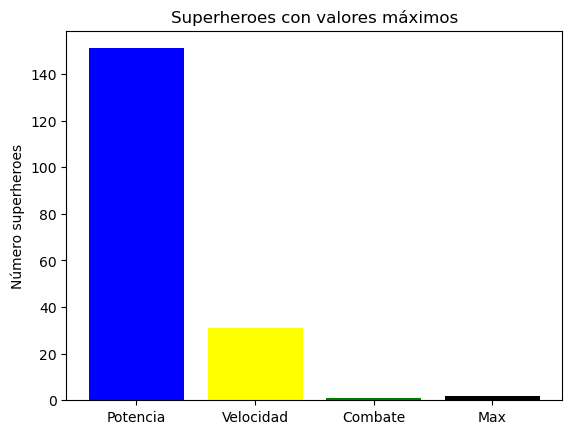

In [87]:
estadisticas = ["Potencia" , "Velocidad" , "Combate" , "Max"]
cantidades = [cantidad_potencia, cantidad_velocidad, cantidad_combate, cantidad_max_val]
colores = ["blue" , "yellow", "green" , "black"]

plt.bar(estadisticas, cantidades, color=colores)
plt.ylabel("Número superheroes")
plt.title("Superheroes con valores máximos")
plt.show

In [17]:
# En en gráfico podemos observar cuantos superheroes con valor de 100 o mas hay por cada habilidad

In [ ]:
# HACER UN GRAFICO CON LOS DOS SUPERHEROES CON MAS HABILIDADES????

In [88]:
prom1 = df1.loc[425, ["Potencia", "Velocidad", "Combate"]].mean() #Man of Miracles
prom1

np.float64(100.0)

In [89]:
prom2 = df1.loc[502, ["Potencia", "Velocidad", "Combate"]].mean() #One above all
prom2

np.float64(100.0)

In [22]:
#Como podemos observar hay dos superheroes que descatacan por encima de los demas.

In [23]:
#2 ¿En base a promediar la inteligencia y la fuerza, ¿Cual es el superheroe que combinada estas dos habilidades tiene el mayor y menor promedio 
#  y cuan lejos estan del promedio general?

In [24]:
df1

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
1,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
2,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0
3,Abomination,63.0,80.0,53.0,90.0,62.0,95.0
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0
...,...,...,...,...,...,...,...
726,Yellowjacket II,50.0,10.0,35.0,28.0,31.0,28.0
727,Ymir,50.0,100.0,27.0,100.0,98.0,28.0
728,Yoda,88.0,52.0,33.0,25.0,100.0,90.0
729,Zatanna,81.0,10.0,23.0,28.0,100.0,56.0


In [92]:
inteligencia_max = df1["Inteligencia"].max() #Super heroe más inteligente
df_max_inteligencia = df1[df1["Inteligencia"] == inteligencia_max]
df_max_inteligencia.head(15)

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
29,Ant-Man,100.0,18.0,23.0,28.0,32.0,32.0
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
69,Batman,100.0,26.0,27.0,50.0,47.0,100.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
135,Brainiac,100.0,95.0,63.0,90.0,60.0,75.0
136,Brainiac 5,100.0,10.0,23.0,28.0,60.0,32.0
209,Data,100.0,32.0,21.0,40.0,56.0,50.0
221,Doctor Doom,100.0,32.0,20.0,100.0,100.0,84.0
225,Doctor Strange,100.0,10.0,12.0,84.0,100.0,60.0
272,Galactus,100.0,100.0,83.0,100.0,100.0,50.0


In [112]:
fuerza_max = df1["Fuerza"].max() #Super heroe más fuerte
df_max_fuerza = df1[df1["Fuerza"] == fuerza_max]
df_max_fuerza.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
19,Amazo,63.0,100.0,83.0,100.0,100.0,100.0
31,Anti-Monitor,88.0,100.0,50.0,100.0,100.0,90.0
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
41,Ardina,63.0,100.0,100.0,80.0,100.0,25.0


In [100]:
menos_inteligente = df1["Inteligencia"].min() #Super heroe menos inteligente
df_menos_inteligente = df1[df1["Inteligencia"] == menos_inteligente]
df_menos_inteligente

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
350,Jack-Jack,6.0,34.0,67.0,80.0,100.0,6.0


In [102]:
menos_fuerte = df1["Fuerza"].min()  #Super heroe menos fuerte
df_menos_fuerte = df1[df1["Fuerza"] == menos_fuerte]
df_menos_fuerte

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
383,Kid Flash,25.0,4.0,92.0,42.0,20.0,30.0
538,Rachel Pirzad,63.0,4.0,8.0,10.0,52.0,10.0


In [103]:
df_max_val_2 = df1[
    (df1["Inteligencia"] >= 100) &
    (df1["Fuerza"] >= 100)     
]
df_max_val_2

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
272,Galactus,100.0,100.0,83.0,100.0,100.0,50.0
409,Living Tribunal,100.0,100.0,100.0,100.0,100.0,30.0
425,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
502,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0
516,Phoenix,100.0,100.0,83.0,100.0,100.0,80.0
654,Thanos,100.0,100.0,33.0,100.0,100.0,80.0


In [109]:
cantidad_inteligencia = df_max_inteligencia.shape[0] #Cantidad de superheroes con inteligencia 100.
cantidad_inteligencia

39

In [113]:
cantidad_fuerza = df_max_fuerza.shape[0] #Cantidad de superheroes con fuerza 100.
cantidad_fuerza

51

In [114]:
cantidad_val_max_fuerza_inteligencia = df_max_val_2.shape[0] #Cantidad de superheroes con inteligencia y fuerza 100.
cantidad_val_max_fuerza_inteligencia

8

In [105]:
prom_1_1 = df1.loc[350,["Inteligencia", "Fuerza"]].mean() #Jack-Jack
prom_1_1

np.float64(20.0)

In [106]:
prom_1_2 = df1.loc[383,["Inteligencia", "Fuerza"]].mean() #Kid Flash
prom_1_2

np.float64(14.5)

In [107]:
prom_1_3 = df1.loc[538,["Inteligencia", "Fuerza"]].mean() #Rachel Pirzad
prom_1_3

np.float64(33.5)

In [108]:
media_inteligencia = df1["Inteligencia"].mean()
print(media_inteligencia)

64.4452296819788


In [233]:
media_fuerza = df1["Fuerza"].mean()
print(media_fuerza)

44.00158982511924


In [234]:
media_fuerza_inteligencia = np.mean([media_inteligencia, media_fuerza])
print(media_fuerza_inteligencia)

54.22340975354902
